# Introduction

In this lab, we will explore Gaussian Process Classification (GPC) with an RBF kernel and different choices of hyperparameters. We will generate data, train the GPC model with both fixed and optimized hyperparameters, and plot the posteriors and the log-marginal-likelihood landscape. We will also evaluate the accuracy and log-loss of the model.

# Import Libraries

We will import the necessary libraries for this lab.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, log_loss
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF

# Generate Data

We will generate data using NumPy. We will generate 100 data points with a uniform distribution between 0 and 5. We will set the threshold to 2.5 and generate the labels using a Boolean expression. We will use the first 50 data points as training data and the remaining as test data.

In [2]:
train_size = 50
rng = np.random.RandomState(0)
X = rng.uniform(0, 5, 100)[:, np.newaxis]
y = np.array(X[:, 0] > 2.5, dtype=int)

# Train the Model

We will train the GPC model using both fixed and optimized hyperparameters. We will print the log-marginal-likelihood, accuracy, and log-loss of the models.

In [3]:
# Fixed Hyperparameters
gp_fix = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0), optimizer=None)
gp_fix.fit(X[:train_size], y[:train_size])

# Optimized Hyperparameters
gp_opt = GaussianProcessClassifier(kernel=1.0 * RBF(length_scale=1.0))
gp_opt.fit(X[:train_size], y[:train_size])

# Results
print("Log Marginal Likelihood (initial): %.3f" % gp_fix.log_marginal_likelihood(gp_fix.kernel_.theta))
print("Log Marginal Likelihood (optimized): %.3f" % gp_opt.log_marginal_likelihood(gp_opt.kernel_.theta))
print("Accuracy: %.3f (initial) %.3f (optimized)" % (accuracy_score(y[:train_size], gp_fix.predict(X[:train_size])), accuracy_score(y[:train_size], gp_opt.predict(X[:train_size]))))
print("Log-loss: %.3f (initial) %.3f (optimized)" % (log_loss(y[:train_size], gp_fix.predict_proba(X[:train_size])[:, 1]), log_loss(y[:train_size], gp_opt.predict_proba(X[:train_size])[:, 1])))

Log Marginal Likelihood (initial): -17.598
Log Marginal Likelihood (optimized): -3.875
Accuracy: 1.000 (initial) 1.000 (optimized)
Log-loss: 0.214 (initial) 0.319 (optimized)


# Plot Posteriors

We will plot the posteriors of the GPC model using both fixed and optimized hyperparameters. We will plot the training data, test data, and the predicted probability of class 1. We will also label the plots.

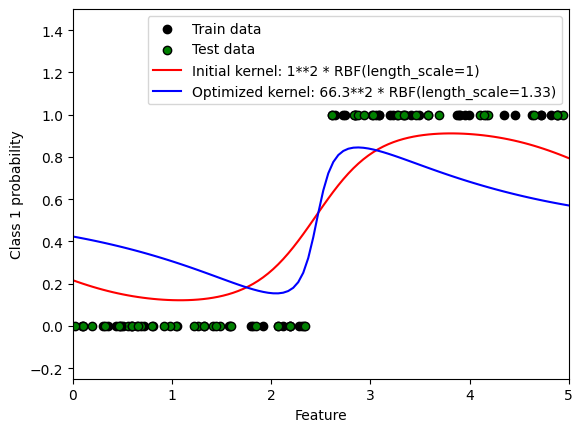

In [4]:
# Plot posteriors
plt.figure()
plt.scatter(X[:train_size, 0], y[:train_size], c="k", label="Train data", edgecolors=(0, 0, 0))
plt.scatter(X[train_size:, 0], y[train_size:], c="g", label="Test data", edgecolors=(0, 0, 0))
X_ = np.linspace(0, 5, 100)
plt.plot(X_, gp_fix.predict_proba(X_[:, np.newaxis])[:, 1], "r", label="Initial kernel: %s" % gp_fix.kernel_)
plt.plot(X_, gp_opt.predict_proba(X_[:, np.newaxis])[:, 1], "b", label="Optimized kernel: %s" % gp_opt.kernel_)
plt.xlabel("Feature")
plt.ylabel("Class 1 probability")
plt.xlim(0, 5)
plt.ylim(-0.25, 1.5)
plt.legend(loc="best")

# Plot LML Landscape

We will plot the log-marginal-likelihood landscape of the GPC model using different choices of hyperparameters. We will highlight the hyperparameters used in the previous plot. We will also label the plots.

Text(0.5, 1.0, 'Log-marginal-likelihood')

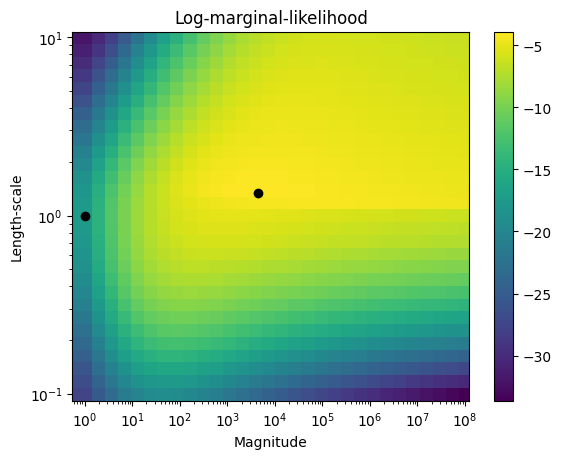

In [5]:
# Plot LML landscape
plt.figure()
theta0 = np.logspace(0, 8, 30)
theta1 = np.logspace(-1, 1, 29)
Theta0, Theta1 = np.meshgrid(theta0, theta1)
LML = [[gp_opt.log_marginal_likelihood(np.log([Theta0[i, j], Theta1[i, j]])) for i in range(Theta0.shape[0])] for j in range(Theta0.shape[1])]
LML = np.array(LML).T
plt.plot(np.exp(gp_fix.kernel_.theta)[0], np.exp(gp_fix.kernel_.theta)[1], "ko", zorder=10)
plt.plot(np.exp(gp_opt.kernel_.theta)[0], np.exp(gp_opt.kernel_.theta)[1], "ko", zorder=10)
plt.pcolor(Theta0, Theta1, LML)
plt.xscale("log")
plt.yscale("log")
plt.colorbar()
plt.xlabel("Magnitude")
plt.ylabel("Length-scale")
plt.title("Log-marginal-likelihood")

# Summary

In this lab, we explored Gaussian Process Classification (GPC) with an RBF kernel and different choices of hyperparameters. We generated data, trained the GPC model with both fixed and optimized hyperparameters, and plotted the posteriors and the log-marginal-likelihood landscape. We also evaluated the accuracy and log-loss of the model.